In [1]:
import constants
cache_folder_name = 'test'
seed = 44

In [2]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

[Errno 17] File exists: '/Users/fultonw/Documents/projects/runs/domain_adapt_run/domain_adapt_run/notebooks/new/cross_validation_multiple_fitters/v_data/cache/test'


In [3]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
import domain_adapt.domain_adapt.new.lsif_constructor as lsif_constructor
import domain_adapt.domain_adapt.new.cv as cv
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.cross_validation_multiple_fitters.run as run
#import data.domain_adapt_data.domain_adapt_data.fxns as data
import domain_adapt.domain_adapt.new.data as data

Couldn't import dot_parser, loading of dot files will not be possible.


In [4]:
# define data getter
def random_data_getter(seed):
    np.random.seed(seed)
    xs_train, xs_test, ys_train, ys_test = data.v_data(
        num_train=100, 
        num_test=50, 
        useful_dim=1, 
        same_dim=10, 
        diff_dim=100
    )
    return xs_train, xs_test, ys_train, ys_test

In [5]:
# define evaluation stuff
eval_num_trials = 70
#eval_num_trials = 10
#eval_which_loss = 'square'
eval_which_loss = 'abs'
#eval_num_folds = 0
eval_num_folds = 3
eval_use_test = True

In [6]:
# define my fitter
cv_which_loss = 'square'
#cv_num_folds = 3
cv_num_folds = 0
#cv_use_test = False
cv_use_test = True
predictor_which_loss = 'square'
#predictor_which_loss = 'logistic'
num_basis = 100
u_dim = 1
pymanopt_options={'logverbosity':1, 'maxiter':10}
many_optimizer_num_cycles = 3
num_tries = 8
B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=(xs_train.shape[1],u_dim)))
tradeoff_weight_regs = 2**np.linspace(-10,3,14)
print tradeoff_weight_regs
#tradeoff_weight_regs = [0.]
#tradeoff_weight_regs = 2**np.linspace(-1,1,3)
plot_b_info = constructors.simple_plot_b_info
#plot_b_info = None
fitter_list = [lsif_constructor.lsif_ratio_fitter(predictor_which_loss, num_basis, tradeoff_weight_reg, B_init_f_getter, num_tries=num_tries, pymanopt_options=pymanopt_options, many_optimizer_num_cycles=many_optimizer_num_cycles, plot_b_info=plot_b_info) for tradeoff_weight_reg in tradeoff_weight_regs]
my_fitter = cv.cv_fitter(fitter_list, cv_which_loss, cv_num_folds, cv_use_test)

[  9.76562500e-04   1.95312500e-03   3.90625000e-03   7.81250000e-03
   1.56250000e-02   3.12500000e-02   6.25000000e-02   1.25000000e-01
   2.50000000e-01   5.00000000e-01   1.00000000e+00   2.00000000e+00
   4.00000000e+00   8.00000000e+00]


In [7]:
# define naive weighted fitter
#cv_which_loss = 'square'
#cv_num_folds = 3
#cv_num_folds = 2
#cv_use_test = False
predictor_which_loss = 'square'
num_basis = 100
#u_dim = 8
#pymanopt_options={'logverbosity':1, 'maxiter':10}
many_optimizer_num_cycles = 1
num_tries = 1
B_init_f_getter = None
learn_projection = False
learn_weights = True
tradeoff_weight_reg = 0.
#tradeoff_weight_regs = 2**np.linspace(-3,3,7)
#tradeoff_weight_regs = 2**np.linspace(-1,1,3)
weighted_fitter = lsif_constructor.lsif_ratio_fitter(predictor_which_loss, num_basis, tradeoff_weight_reg, B_init_f_getter, learn_weights=learn_weights, learn_projection=learn_projection, num_tries=num_tries, many_optimizer_num_cycles=many_optimizer_num_cycles)
#fitter = cv.cv_fitter(fitter_list, cv_which_loss, cv_num_folds, cv_use_test)

In [8]:
# define random projection weighted fitter
#cv_which_loss = 'square'
#cv_num_folds = 3
#cv_num_folds = 2
#cv_use_test = False
predictor_which_loss = 'square'
num_basis = 100
#u_dim = 8
#pymanopt_options={'logverbosity':1, 'maxiter':10}
many_optimizer_num_cycles = 1
num_tries = 1
B_init_f_getter = None
learn_projection = False
learn_weights = True
random_projection = 1
tradeoff_weight_reg = 0.
plot_b_info = constructors.simple_plot_b_info
#plot_b_info = None
#tradeoff_weight_regs = 2**np.linspace(-3,3,7)
#tradeoff_weight_regs = 2**np.linspace(-1,1,3)
random_projection_weighted_fitter = lsif_constructor.lsif_ratio_fitter(predictor_which_loss, num_basis, tradeoff_weight_reg, B_init_f_getter, random_projection=random_projection, learn_weights=learn_weights, learn_projection=learn_projection, num_tries=num_tries, many_optimizer_num_cycles=many_optimizer_num_cycles, plot_b_info=plot_b_info)
#fitter = cv.cv_fitter(fitter_list, cv_which_loss, cv_num_folds, cv_use_test)

In [9]:
# define unweighted baseline
#cv_which_loss = 'square'
#cv_num_folds = 3
#cv_num_folds = 2
#cv_use_test = False
predictor_which_loss = 'square'
num_basis = 100
#u_dim = 8
#pymanopt_options={'logverbosity':1, 'maxiter':10}
many_optimizer_num_cycles = 3
num_tries = 1
B_init_f_getter = None
learn_projection = False
learn_weights = False
tradeoff_weight_reg = 0.
#tradeoff_weight_regs = 2**np.linspace(-3,3,7)
#tradeoff_weight_regs = 2**np.linspace(-1,1,3)
unweighted_fitter = lsif_constructor.lsif_ratio_fitter(predictor_which_loss, num_basis, tradeoff_weight_reg, B_init_f_getter, learn_weights=learn_weights, learn_projection=learn_projection, num_tries=num_tries, many_optimizer_num_cycles=many_optimizer_num_cycles)
#fitter = cv.cv_fitter(fitter_list, cv_which_loss, cv_num_folds, cv_use_test)

In [ ]:
#
fitter_infos = [
    ('mine', my_fitter),
#    ('unweighted', unweighted_fitter),
#    ('weighted', weighted_fitter),
#    ('random_weighted', random_projection_weighted_fitter)
]

multiple [0.0090046026911865425, 0.0090046089860219523, 0.0090046039306837956, 0.0090045946508331576, 0.0090046058760725814, 0.009004611328893717, 0.0090046081319347607, 0.0090046001787220647]
best val 0.00900459465083
{'_val': <function <lambda> at 0x113f08140>, 'B': array([[ -3.20124733e-02],
       [  9.95487904e-01],
       [  8.55537197e-04],
       [  2.72818569e-02],
       [ -1.06819254e-02],
       [  2.22110401e-02],
       [  1.34931821e-02],
       [ -1.22063774e-02],
       [  2.06923752e-02],
       [ -2.01876109e-03],
       [  1.91566482e-02],
       [ -2.11456389e-03],
       [ -1.70201838e-02],
       [ -6.44446856e-03],
       [  9.91550963e-03],
       [  1.76852847e-03],
       [ -8.69387089e-03],
       [  3.89135703e-03],
       [  8.73703002e-03],
       [ -8.30173771e-03],
       [ -2.66694009e-03],
       [  7.12477696e-03],
       [ -6.31177701e-03],
       [  5.33709893e-03],
       [ -1.20495561e-03],
       [ -1.52347570e-03],
       [ -1.41467275e-03],
  

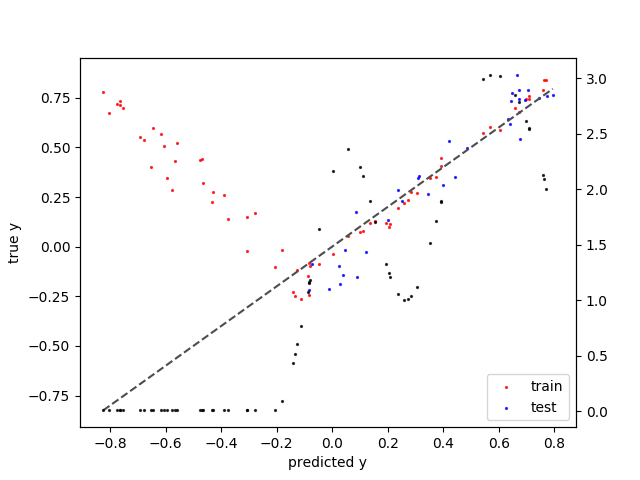

0.0122902297971 squared error
0.0899675551654 abs error
--Return--
> /Users/fultonw/Documents/projects/code/domain_adapt/domain_adapt/new/constructors.py(54)simple_plot_b_info()->None
-> pdb.set_trace()
(Pdb) c
multiple [0.011934504971978165, 0.012260402682726181, 0.012260407465123394, 0.012300072998722702, 0.01192377963176686, 0.012031239338132754, 0.012300072957276052, 0.011966894626828244]
best val 0.0119237796318
{'_val': <function <lambda> at 0x11417b410>, 'B': array([[ -2.62483495e-02],
       [  9.97549565e-01],
       [  4.16427728e-03],
       [  1.91087582e-02],
       [ -9.51751938e-03],
       [  2.00287134e-02],
       [  9.02847831e-03],
       [ -8.21091872e-03],
       [  1.27657760e-02],
       [ -2.63891613e-03],
       [  1.40063530e-02],
       [ -1.98658521e-03],
       [ -1.14022285e-02],
       [ -3.10283027e-03],
       [  8.18633574e-03],
       [  3.07760790e-05],
       [ -5.17246675e-03],
       [  1.21853234e-03],
       [  6.46251093e-03],
       [ -4.9385

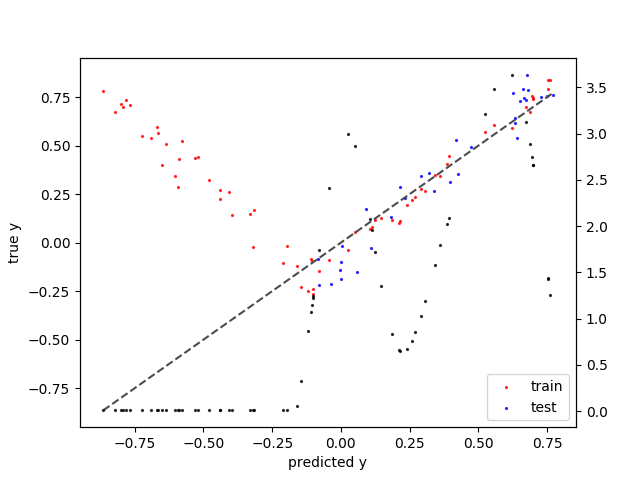

0.0103967822536 squared error
0.0832288199112 abs error
--Return--
> /Users/fultonw/Documents/projects/code/domain_adapt/domain_adapt/new/constructors.py(54)simple_plot_b_info()->None
-> pdb.set_trace()
(Pdb) c
multiple [0.017822158297227587, 0.017860093662302845, 0.017776633552904236, 0.017961984058178473, 0.017854470231547848, 0.017850318450696297, 0.017826232968402883, 0.017850347534817915]
best val 0.0177766335529
{'_val': <function <lambda> at 0x114143938>, 'B': array([[ -1.46416254e-02],
       [  9.99374056e-01],
       [  2.11232895e-03],
       [  9.11400050e-03],
       [ -5.06123544e-03],
       [  1.03342769e-02],
       [  3.66537732e-03],
       [ -4.70077864e-03],
       [  5.32369094e-03],
       [ -2.23059824e-03],
       [  7.04884503e-03],
       [ -7.40468875e-04],
       [ -4.68915014e-03],
       [ -7.63312664e-04],
       [  4.97593901e-03],
       [ -2.54147279e-04],
       [ -1.29802035e-03],
       [  5.36341867e-04],
       [  2.76091123e-03],
       [ -1.689

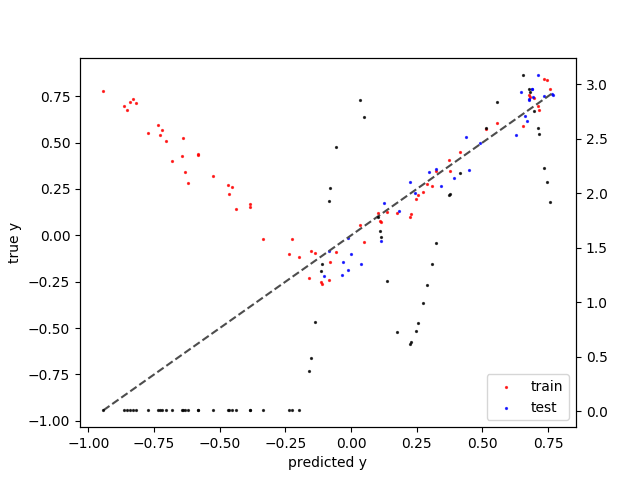

0.00843037454803 squared error
0.0746061281133 abs error
--Return--
> /Users/fultonw/Documents/projects/code/domain_adapt/domain_adapt/new/constructors.py(54)simple_plot_b_info()->None
-> pdb.set_trace()
(Pdb) c
multiple [0.027339958735008305, 0.027415617719857656, 0.027355446592036668, 0.027339613178838089, 0.02731338330085855, 0.027320254677707444, 0.02731912574891724, 0.02733960332224241]
best val 0.0273133833009
{'_val': <function <lambda> at 0x113f18ed8>, 'B': array([[ -7.84286966e-03],
       [  9.99849563e-01],
       [  7.59836718e-04],
       [  5.08866036e-03],
       [ -2.84111402e-03],
       [  4.47981972e-03],
       [  1.96475663e-03],
       [ -1.74949872e-03],
       [  2.46701909e-03],
       [ -6.24889791e-04],
       [  3.02758878e-03],
       [  2.79799665e-04],
       [ -1.61552958e-03],
       [ -1.42622899e-04],
       [  2.51283120e-03],
       [ -2.89838213e-05],
       [  9.74964603e-06],
       [  4.66215353e-04],
       [  1.38374682e-03],
       [ -6.11527

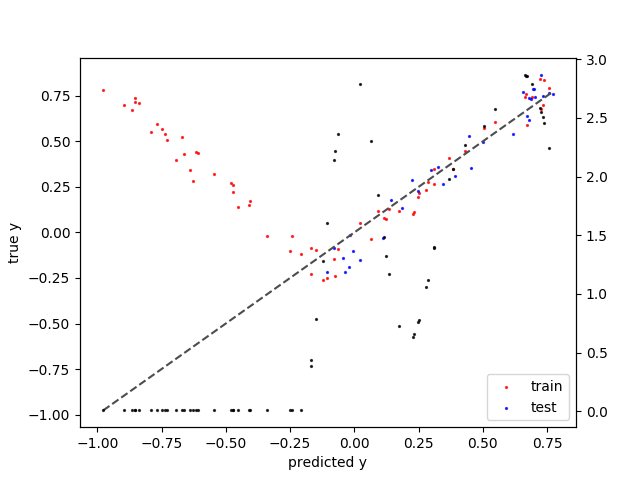

0.00761312930606 squared error
0.0713454020745 abs error
--Return--
> /Users/fultonw/Documents/projects/code/domain_adapt/domain_adapt/new/constructors.py(54)simple_plot_b_info()->None
-> pdb.set_trace()
(Pdb) c
multiple [0.03567697014645483, 0.036218476983336585, 0.036234840949581563, 0.036257811199102367, 0.035682460257295059, 0.036252063389859729, 0.036234844530175003, 0.036218476983336585]
best val 0.0356769701465
{'_val': <function <lambda> at 0x114769a28>, 'B': array([[ -5.32338501e-02],
       [  9.92452638e-01],
       [ -6.70748877e-03],
       [  3.44210215e-02],
       [ -2.95776019e-02],
       [  2.26151273e-02],
       [  5.86638030e-03],
       [ -1.11137055e-02],
       [  1.57322173e-02],
       [  7.35094969e-03],
       [  1.61466240e-02],
       [  2.67301394e-04],
       [ -2.09828465e-02],
       [ -5.61838368e-03],
       [  2.01611450e-02],
       [ -2.14142218e-03],
       [ -6.04752174e-03],
       [  9.77313798e-03],
       [  8.35088239e-03],
       [ -5.952

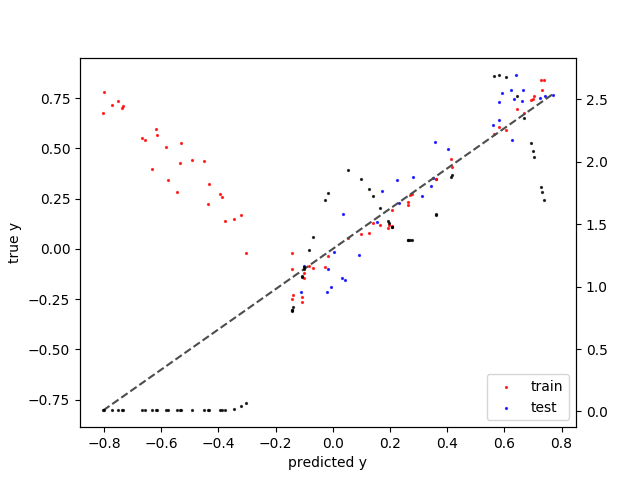

0.0136648790835 squared error
0.0970287399253 abs error
--Return--
> /Users/fultonw/Documents/projects/code/domain_adapt/domain_adapt/new/constructors.py(54)simple_plot_b_info()->None
-> pdb.set_trace()
(Pdb) c
multiple [0.066915568421049218, 0.066963476679660044, 0.066963484402927681, 0.066925767267834002, 0.066915569987876816, 0.066963482516520512, 0.066963456246476247, 0.066912562879067661]
best val 0.0669125628791
{'_val': <function <lambda> at 0x115336398>, 'B': array([[ -2.35694707e-02],
       [  9.98275483e-01],
       [ -3.60977857e-03],
       [  1.58052295e-02],
       [ -2.06745207e-02],
       [  1.00748306e-02],
       [  1.43917984e-03],
       [ -9.29878943e-04],
       [  6.43384491e-03],
       [  1.81071097e-03],
       [  1.21070527e-02],
       [  3.78355529e-03],
       [ -6.36444912e-03],
       [ -2.32514269e-03],
       [  8.26910866e-03],
       [  3.39884190e-04],
       [ -1.12123275e-03],
       [  6.76916905e-03],
       [  3.57545684e-03],
       [ -7.283

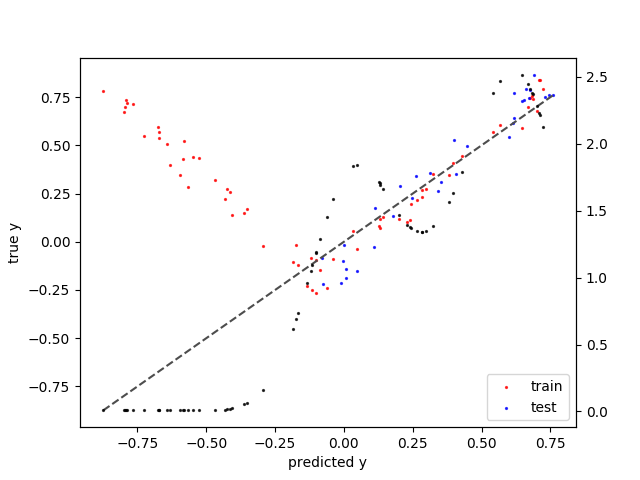

0.0105935293045 squared error
0.0835790077819 abs error
--Return--
> /Users/fultonw/Documents/projects/code/domain_adapt/domain_adapt/new/constructors.py(54)simple_plot_b_info()->None
-> pdb.set_trace()
(Pdb) c


In [ ]:
# run
run.run(random_data_getter, eval_num_trials, eval_which_loss, eval_num_folds, eval_use_test, fitter_infos)